In [150]:
import pandas as pd

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#ignore Warning 
import warnings
warnings.filterwarnings('ignore')

In [152]:
train = pd.read_csv('./train.csv')
teste = pd.read_csv('./test.csv')
teste_ids = teste['PassengerId']

In [153]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
train["Age"] = train["Age"].fillna(-0.5)

In [155]:
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [156]:
train.describe(include= 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,23.699966,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,17.731181,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,6.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [157]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [158]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,C68,C
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,NaN,S
565,566,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.1500,NaN,S
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S


In [159]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Percentage of Females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


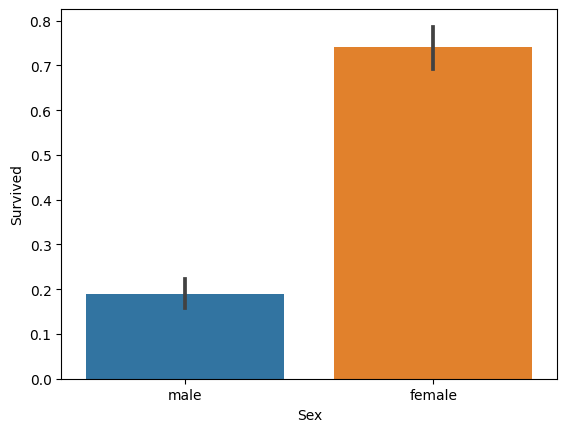

In [160]:
sns.barplot(x='Sex', y='Survived', data=train)
print("Percentage of Females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize=True)[1]*100)
print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize=True)[1]*100)

Percentage of Pclass = 1 who Survived 62.96296296296296
Percentage of Pclass = 2 who Survived 47.28260869565217
Percentage of Pclass = 3 who Survived 24.236252545824847


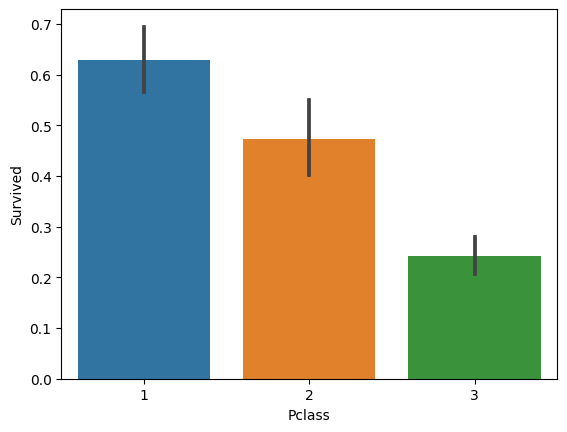

In [161]:
sns.barplot(x='Pclass', y='Survived', data=train)
print("Percentage of Pclass = 1 who Survived", train["Survived"][train["Pclass"] == 1].value_counts(normalize=True)[1]*100)
print("Percentage of Pclass = 2 who Survived", train["Survived"][train["Pclass"] == 2].value_counts(normalize=True)[1]*100)
print("Percentage of Pclass = 3 who Survived", train["Survived"][train["Pclass"] == 3].value_counts(normalize=True)[1]*100)

Percentage of Pclass = 0 who Survived 34.53947368421053
Percentage of Pclass = 1 who Survived 53.588516746411486
Percentage of Pclass = 2 who Survived 46.42857142857143


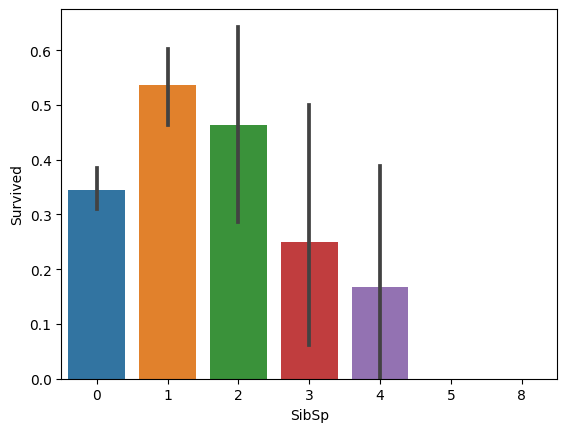

In [162]:
sns.barplot(x='SibSp', y='Survived', data=train)
print("Percentage of Pclass = 0 who Survived", train["Survived"][train["SibSp"] == 0].value_counts(normalize=True)[1]*100)
print("Percentage of Pclass = 1 who Survived", train["Survived"][train["SibSp"] == 1].value_counts(normalize=True)[1]*100)
print("Percentage of Pclass = 2 who Survived", train["Survived"][train["SibSp"] == 2].value_counts(normalize=True)[1]*100)

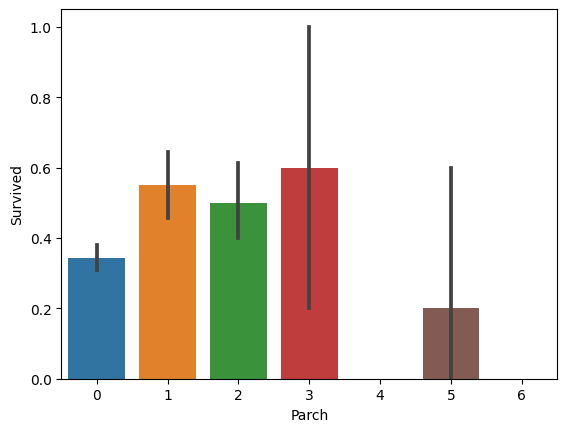

In [163]:
sns.barplot(x='Parch', y='Survived', data=train)
plt.show()

In [164]:
train["Age"]





0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    -0.5
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

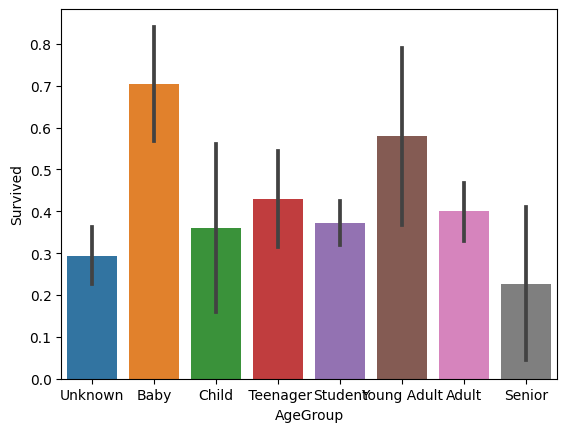

In [165]:
train["Age"] = train["Age"].fillna(-0.5)
teste["Age"] = teste["Age"].fillna(-0.5)
bins = [-1,0,5,12,18,34,35,60, np.inf]
labels = ['Unknown', 'Baby', 'Child', ' Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels= labels)
teste['AgeGroup'] = pd.cut(teste["Age"], bins, labels= labels)
sns.barplot(x="AgeGroup", y="Survived", data = train)
plt.show()

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


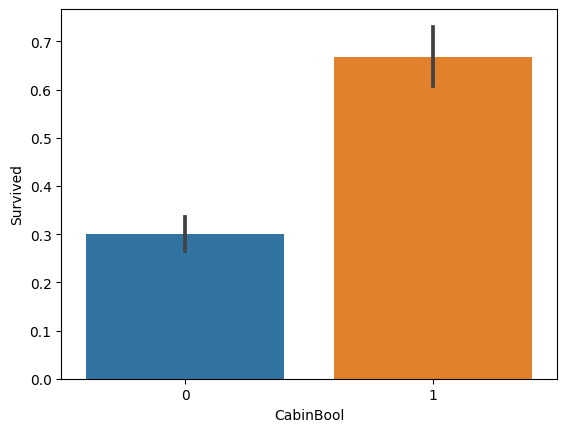

In [166]:
train["CabinBool"] = (train ["Cabin"].notnull().astype('int'))
teste["CabinBool"] = (teste ["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived

print("Percentage of CabinBool = 1 who survived:", train["Survived"] [train["CabinBool"] == 1].value_counts (normalize = True) [1]*100)
print("Percentage of CabinBool = 0 who survived:", train["Survived"] [train["CabinBool"] == 0].value_counts (normalize = True) [1]*100)

sns.barplot(x="CabinBool", y="Survived", data = train)
plt.show()

In [167]:
teste.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Student,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,167,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


In [168]:
#Extraindo a coluna cabine

train = train.drop(['Cabin'], axis= 1)
teste = teste.drop(['Cabin'], axis= 1)

#Extraindo a coluna ticket

train = train.drop(['Ticket'], axis= 1)
teste = teste.drop(['Ticket'], axis= 1)

In [169]:
print("Number of people embarking in Southampton (s)")
Southampton = train[train["Embarked"] == "S"].shape[0]
print(Southampton)

print("Number of people embarking in Cherbourg (C)")
Cherbourg = train[train["Embarked"] == "C"].shape[0]
print(Cherbourg)

print("Number of people embarking in Queenstown (Q)")
Queenstown = train[train["Embarked"] == "Q"].shape[0]
print(Queenstown)

Number of people embarking in Southampton (s)
644
Number of people embarking in Cherbourg (C)
168
Number of people embarking in Queenstown (Q)
77


In [170]:
train = train.fillna({"Embarked":"S"})

In [171]:
combine = [train, teste]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract (' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [172]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace(['Countess','Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('M1le', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Miss')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mlle,1.000000
3,Mr,0.156673
4,Mrs,0.792000
5,Rare,0.285714
6,Royal,1.000000


In [173]:
title_mapping = {"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Royal":5,"Rare":6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Student,0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1.0


In [174]:
# Import necessary libraries and load the data (assuming you have done this already)

# Fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode()[0]  # Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode()[0]  # Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode()[0]  # Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode()[0]  # Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode()[0]  # Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode()[0]  # Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

In [175]:
# Replace "Unknown" values in "AgeGroup" column of the "train" DataFrame
for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]

# Replace "Unknown" values in "AgeGroup" column of the "teste" DataFrame
for x in range(len(teste["AgeGroup"])):
    if teste["AgeGroup"][x] == "Unknown":
        teste["AgeGroup"][x] = age_title_mapping[teste["Title"][x]]


In [176]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}

train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
teste['AgeGroup'] = teste['AgeGroup'].map(age_mapping)

train.head()

# Dropping the "Age" feature
train = train.drop(['Age'], axis=1)
teste = teste.drop(['Age'], axis=1)


In [177]:
train = train.drop(['Name'], axis=1)
teste = teste.drop(['Name'], axis=1)

In [178]:
#map each Sex value to a numerical value

sex_mapping = {"male": 0, "female": 1} 
train['Sex'] = train['Sex'].map(sex_mapping)

teste['Sex'] = teste['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1.0
1,2,1,1,1,1,0,71.2833,C,6.0,1,3.0
2,3,1,3,1,0,0,7.9250,S,4.0,0,2.0
3,4,1,1,1,1,0,53.1000,S,5.0,1,3.0
4,5,0,3,0,0,0,8.0500,S,5.0,0,1.0


In [179]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}

train['Embarked'] = train['Embarked'].map(embarked_mapping)
teste['Embarked'] = teste['Embarked'].map(embarked_mapping)

train.head()


,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1.0
1,2,1,1,1,1,0,71.2833,2,6.0,1,3.0
2,3,1,3,1,0,0,7.9250,1,4.0,0,2.0
3,4,1,1,1,1,0,53.1000,1,5.0,1,3.0
4,5,0,3,0,0,0,8.0500,1,5.0,0,1.0


In [181]:
# Fill in missing Fare value in test set based on mean fare for that Pclass
for x in range(len(teste["Fare"])):
    if pd.isnull(teste["Fare"][x]):
        pclass = teste["Pclass"][x]
        teste["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)

# Map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels=[1, 2, 3, 4])
teste['FareBand'] = pd.qcut(teste['Fare'], 4, labels=[1, 2, 3, 4])

# Drop Fare values
train = train.drop(['Fare'], axis=1)
teste = teste.drop(['Fare'], axis=1)


In [182]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1.0,1
1,2,1,1,1,1,0,2,6.0,1,3.0,4
2,3,1,3,1,0,0,1,4.0,0,2.0,2
3,4,1,1,1,1,0,1,5.0,1,3.0,4
4,5,0,3,0,0,0,1,5.0,0,1.0,2


In [183]:
teste.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5.0,0,1,1
1,893,3,1,1,0,1,6.0,0,3,1
2,894,2,0,0,0,3,7.0,0,1,2
3,895,3,0,0,0,1,4.0,0,1,2
4,896,3,1,1,1,1,4.0,0,3,2


In [184]:
from sklearn.model_selection import train_test_split

In [187]:
predictors = train.drop(['Survived', 'PassengerId'], axis=1) 
target = train["Survived"]

x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state= 9)

In [191]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Create an imputer to handle missing values (NaN) by replacing them with the mean of each feature
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the training data and transform both training and validation data
x_train_imputed = imputer.fit_transform(x_train)
x_val_imputed = imputer.transform(x_val)

# Create and fit the Gaussian Naive Bayes model with the imputed data
gaussian = GaussianNB()
gaussian.fit(x_train_imputed, y_train)

# Predict using the fitted model
y_pred = gaussian.predict(x_val_imputed)

# Calculate accuracy
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)

print(acc_gaussian)


79.19


In [198]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Create an imputer to handle missing values (NaN) by replacing them with the mean of each feature
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the training data and transform both training and validation data
x_train_imputed = imputer.fit_transform(x_train)
x_val_imputed = imputer.transform(x_val)

# Create an instance of the SVM classifier
svc = SVC()

# Fit the SVM model to the training data with the imputed data
svc.fit(x_train_imputed, y_train)

# Predict using the fitted model
y_pred = svc.predict(x_val_imputed)

# Calculate accuracy
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)

print(acc_svc)

77.16


In [202]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Create an imputer to handle missing values (NaN) by replacing them with the mean of each feature
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the training data and transform both training and validation data
x_train_imputed = imputer.fit_transform(x_train)
x_val_imputed = imputer.transform(x_val)

# Create an instance of the LinearSVC classifier
linear_svc = LinearSVC()

# Fit the LinearSVC model to the training data with the imputed data
linear_svc.fit(x_train_imputed, y_train)

# Predict using the fitted model
y_pred = linear_svc.predict(x_val_imputed)

# Calculate accuracy
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)

print(acc_linear_svc)


79.7


In [ ]:
from sklearn.linear_model import Parceptron

Parceptron = 